# Querying Guide

Database access with config file:

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, event
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())

[2023-01-09 17:03:50,913][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-01-09 17:03:51,016][INFO]: Connected tobiasr@172.26.128.53:3306


Loading DLC 2.2.1.1...


/Users/trose/opt/miniconda3/envs/datajoint/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


Manual entry database access:

In [ ]:
# Manual Entry
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'        # Put the server name between these apostrophe
dj.config['database.user'] = 'danielmk'             # Put your user name between these apostrophe
dj.config['database.password'] = getpass.getpass()  # Put your password in the prompt
dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, event
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())

### Get all Sessions and Scans of an Animal

In [ ]:
query = session.Session() * scan.Scan() & 'subject = "ROS-1438"'

In [ ]:
query

In [ ]:
v

In [ ]:
query = session.Session() * event.Event() & 'event_type = "mini2p_frames"'

In [ ]:
query

In [ ]:
query = session.Session() * event.Event() & 'event_type = "main_track_gate"'

In [ ]:
query

In [ ]:
query = session.Session() * event.Event() & 'event_type = "shutter"'
query

In [ ]:
from pywavesurfer import ws
path = event.BehaviorRecording.File().fetch('filepath')
print(fp)

path = ws.loadDataFile(filename=fp[0], format_string='double' )

In [2]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
from pywavesurfer import ws
from IPython.display import display
import pdb

path = event.BehaviorRecording.File().fetch('filepath')

hf = ws.loadDataFile(filename=path[0], format_string='double' )

def demultiplex(auxdata, channels=5):
    """Demultiplex the digital data"""
    auxdata = auxdata.flatten()
    binary = [[int(x) for x in f'{x:0{channels}b}'] for x in auxdata]
    return np.array(binary, dtype=bool).T

sweep = [x for x in hf.keys() if 'sweep' in x][0]

sr = hf['header']['AcquisitionSampleRate'][0][0]
timebase = np.arange(hf[sweep]['analogScans'].shape[1]) / sr

# DIGITAL SIGNALS
digital_channels = demultiplex(hf[sweep]['digitalScans'][0], 5)
main_track_gate_chan = digital_channels[4]
shutter_chan = digital_channels[3]
mini2p_frame_chan = digital_channels[2]
mini2p_line_chan = digital_channels[1]
mini2p_vol_chan = digital_channels[0]

# ANALOG SIGNALS
cam_trigger = hf[sweep]['analogScans'][0]
bpod_trial_vis_chan = hf[sweep]['analogScans'][1]
bpod_reward1_chan = hf[sweep]['analogScans'][2]
bpod_tone_chan = hf[sweep]['analogScans'][3]



/Users/trose/opt/miniconda3/envs/datajoint/lib/python3.8/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.5, latest version tested: 0.97
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


Text(0.5, 0, 'time (s)')

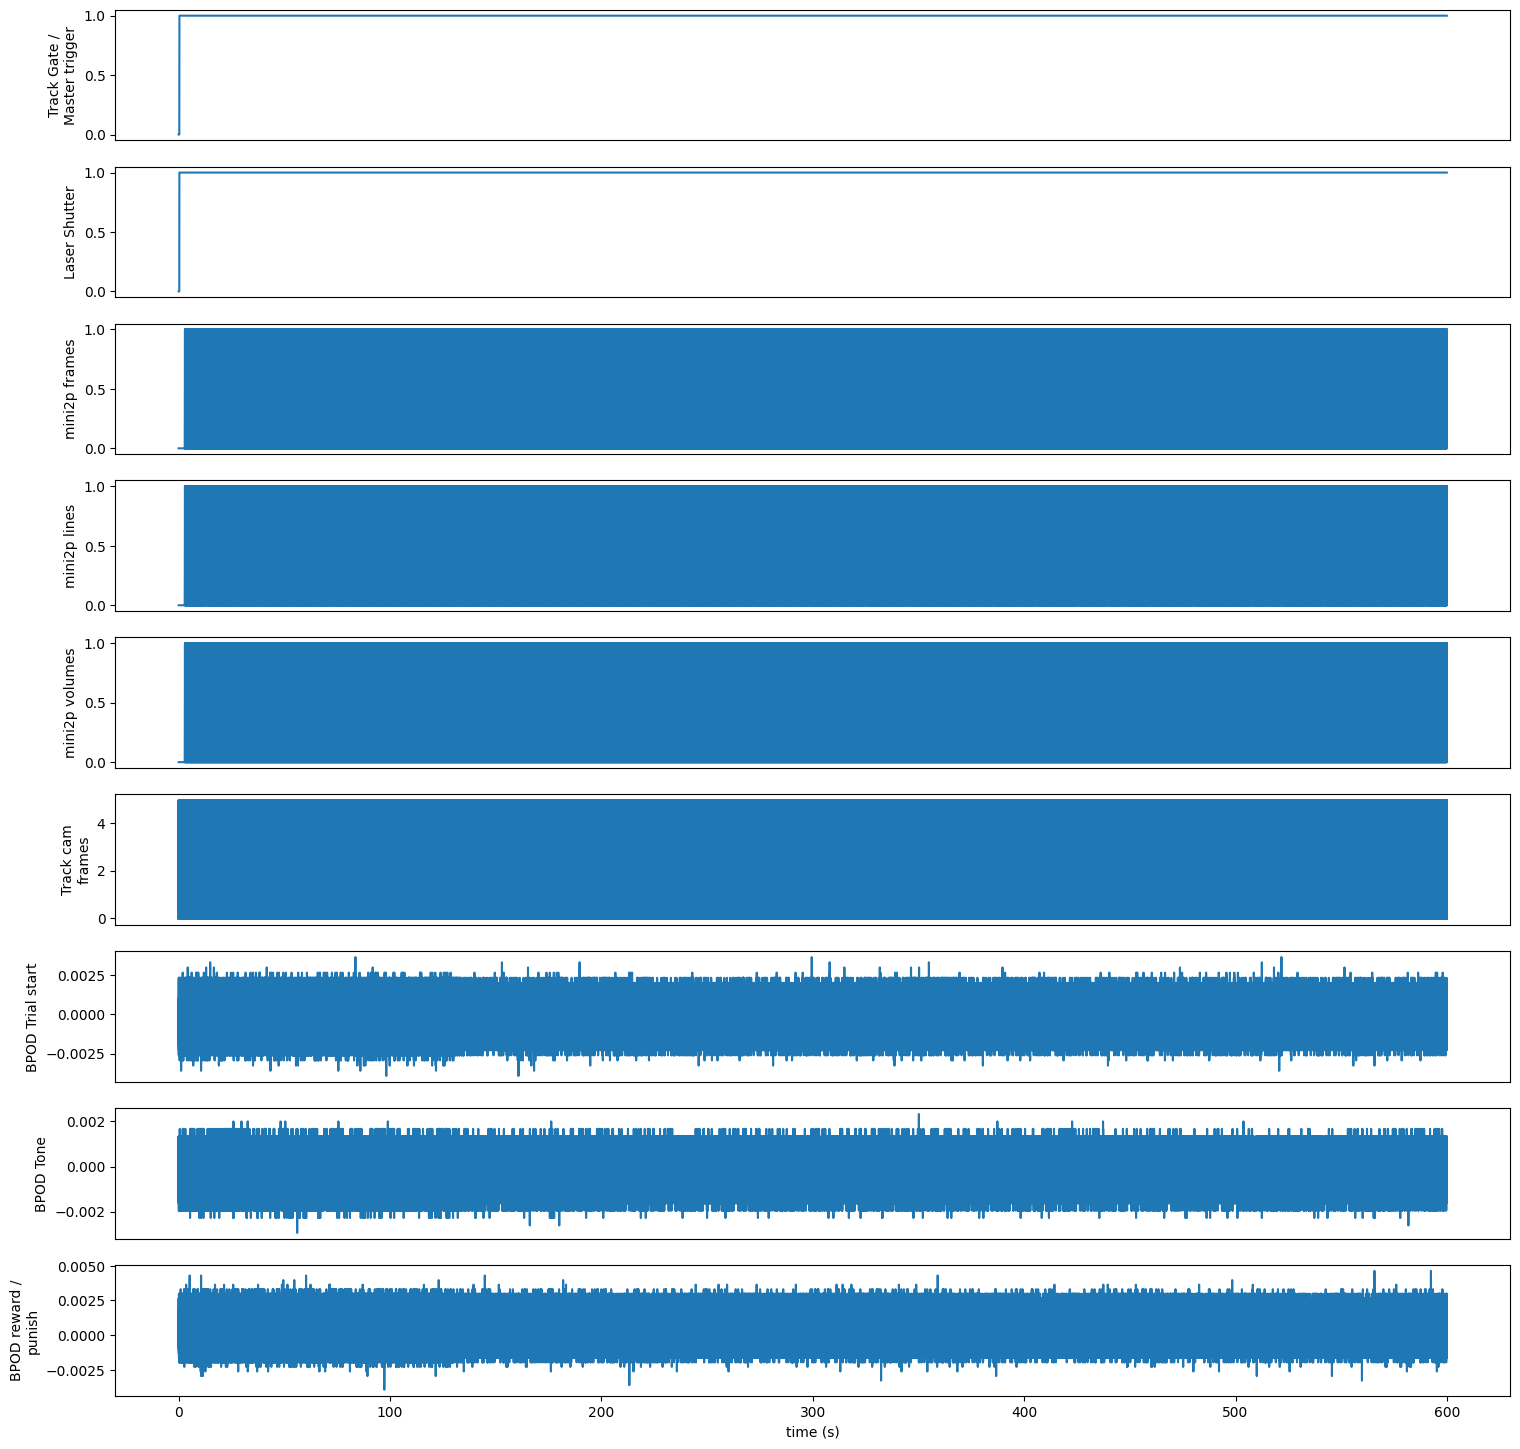

In [4]:
fig, ax = plt.subplots(9, 1, figsize=(18, 18))
ax[0].plot(timebase, main_track_gate_chan)
ax[1].plot(timebase, shutter_chan)
ax[2].plot(timebase, mini2p_frame_chan)
ax[3].plot(timebase, mini2p_line_chan)
ax[4].plot(timebase, mini2p_vol_chan)
ax[5].plot(timebase, cam_trigger)
ax[6].plot(timebase, bpod_trial_vis_chan)
ax[7].plot(timebase,bpod_tone_chan)
ax[8].plot(timebase, bpod_reward1_chan)

for a in ax[:-1]:
    a.set_xticks([])

ax[0].set_ylabel('Track Gate /\nMaster trigger')
ax[1].set_ylabel('Laser Shutter')
ax[2].set_ylabel("mini2p frames")
ax[3].set_ylabel("mini2p lines")
ax[4].set_ylabel("mini2p volumes")
ax[5].set_ylabel("Track cam\nframes")
ax[6].set_ylabel("BPOD Trial start")
ax[7].set_ylabel("BPOD Tone")
ax[8].set_ylabel("BPOD reward /\npunish")
ax[8].set_xlabel("time (s)")

#display(fig, width="100%")


In [ ]:

"""Calculate timestamps"""
def get_timestamps(data, sr, thr=1, inverse=False):
    if data.dtype == 'bool':
        data = data > 0.5
    else:
        data = data > thr
    if inverse: data = not data
    
    diff = np.diff(data)
    idc = np.argwhere(diff != 0)[:, 0]
    timestamps = idc / sr

    return timestamps

ts_main_track_gate_chan = get_timestamps(main_track_gate_chan, sr)
ts_shutter_chan = get_timestamps(shutter_chan, sr)
ts_mini2p_frame_chan = get_timestamps(mini2p_frame_chan, sr)
ts_mini2p_line_chan = get_timestamps(mini2p_line_chan, sr)
ts_mini2p_vol_chan = get_timestamps(mini2p_vol_chan, sr)

ts_bpod_tone_chan = get_timestamps(bpod_tone_chan, sr)

### How many mice?


In [ ]:
query = subject.Subject()
query.fetch().size

### How many scans per mouse

In [ ]:
query = session.Session() * scan.Scan() & 'subject = "WEZ-8701"'
query.fetch().size

In [ ]:
query

### Plot events

In [ ]:
query = session.Session() * scan.Scan() & 'subject = "ROS-1438"'